In [1]:
import pandas as pd

file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

## TIP
- 왜? '\t'-> 구분자가 탭(tab) 이라면 sep = '\t' 
- (raw data를 확인해서 구분자 정해주기)

-----

In [2]:
print(chipo.shape)
print("=======================================")
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
print(chipo.columns)
print("=========================================")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [5]:
chipo['order_id'] = chipo['order_id'].astype(str)
#order_id는 숫자로 인식하는데 숫자로 인식할 필요가 없는 '범주형 데이터?'

In [6]:
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [7]:
print(len(chipo['order_id'].unique())) #order_id의 개수
print(len(chipo['item_name'].unique())) #item_name의 개수

1834
50


-----

## 가장 많이 주문한 item


- 가장 많이 주문한 item은 무엇인지
- item당 주문외 총량은 얼마인지

In [8]:
#가장 많이 주문한 item : top 10을 출력합니다.
# value_counts : 컬럼/Series의 unique value들을 count해주는 함수
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [9]:
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print('Top', idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


In [10]:
TOP1 = item_count.index[0]
print(TOP1)

Chicken Bowl


In [11]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

### TIP
- enumerate : 반복문 사용 시 몇 번째 반복문인지 확인, 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
- #1 을 붙여주는 이유는 top 1 부터 시작하기 위해
- df.index.tolist() # 인덱스 -> 리스트로 출력

-----

# item당 주문 개수와 총량

In [12]:
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [13]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

----

## 시각화로 분석 결고 살펴보기

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
item_name_list = item_quantity.index.tolist() #주문총량
a = len(item_name_list)
print(item_name_list)
print('==========================================')
print(a)

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

In [16]:
order_cnt = item_quantity.values.tolist()
b = len(item_quantity.values.tolist())
print(order_cnt)
print(b)

[55, 66, 91, 12, 10, 25, 211, 4, 6, 126, 351, 71, 60, 8, 1, 6, 40, 761, 591, 50, 9, 123, 120, 230, 130, 506, 1, 23, 18, 45, 50, 33, 25, 2, 20, 29, 2, 110, 221, 386, 36, 4, 31, 56, 87, 97, 1, 6, 18, 8]
50


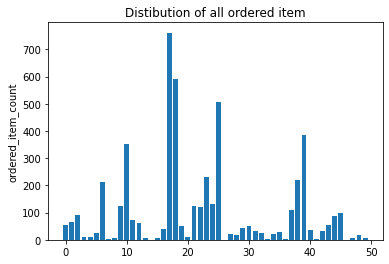

In [17]:
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distibution of all ordered item')

plt.show()



In [18]:
print(chipo['item_name'].value_counts()[:10]) #series

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [19]:
print(chipo['item_name'].unique()[:10]) #ndarray

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


## apply와 lamda 함수를 이용한 데이터 전처리

In [20]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [21]:
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [154]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [27]:
chipo['item_price'][1:] 

1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
5       $10.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4621, dtype: object

In [28]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### Q! 여기서 float(x[1:])) 인 이유는?

In [29]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

## 주문 당 평균 계산 금액 출력

In [30]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [34]:
chipo.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

## 한 주문에 10달러 이상 사용한 주문 번호 출력

In [59]:
chipo_orderid_group = chipo.groupby('order_id').sum()

In [84]:
result = chipo_orderid_group[chipo_orderid_group.item_price >= 10] 

In [89]:
print(result.index.values)

['1' '10' '100' ... '997' '998' '999']


## 각 아이템의 가격 구하기 --> 모르겠다!

In [90]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [91]:
chipo_one_item = chipo[chipo.quantity ==1]

In [156]:
chipo_one_item.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98


In [164]:
price_per_item = chipo_one_item.groupby('item_name')
price_per_item = price_per_item.min() # 그럼 여기서 min은 무엇을 기준으로..?

여기서 min을 쓰는 이유: 

In [165]:
price_per_item.sort_values(by = "item_price", ascending = False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [173]:
#아이템 가격 분포 그래프
item_name_list = price_per_item.index.tolist()
print(item_name_list)

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

In [174]:
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

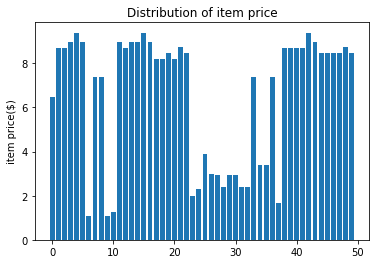

In [178]:
plt.bar(x_pos,item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

In [ ]:
#df.index.tolist()  인덱스 -> 리스트로 출력

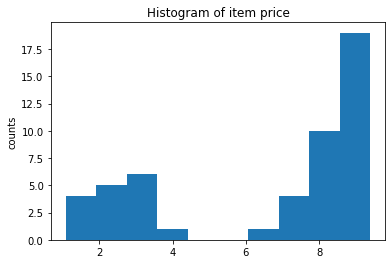

In [180]:
#히스토그램

plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

## 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [102]:
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = True)[:5]

,quantity,item_price
order_id,,
388,2,10.08
1494,2,10.08
1162,2,10.08
332,2,10.08
188,2,10.08


## vaggie salad bowl 이 몇 번 주문되었는지 구하기

In [104]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [126]:
chipo_veggie = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
chipo_veggie

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [127]:
print(len(chipo_veggie))

18


## chicken bowl 을 2개 이상 주문한 횟수 구하기

In [128]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [134]:
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [135]:
chipo_chicken_pick = chipo_chicken[chipo_chicken['quantity'] >= 2]
chipo_chicken_pick.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50


In [136]:
print(len(chipo_chicken_pick))

33


#### 2개 이상 주문한 고객들의 총 주문 수량


In [150]:
chipo_chicken_ordersum = chipo_chicken.groupby("order_id").sum()['quantity']
more_than_2 = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
more_than_2.head()

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

In [151]:
print(len(more_than_2))

114
